In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
START_DATE = dt.datetime.strptime("2019-01", "%Y-%m")

In [3]:
import glob
import os

path = r"*Enter the path pointing to the 'Sentiment_Output_Files' folder*" # use your path

all_files = sorted(glob.glob(os.path.join(path, "*.csv")))

In [4]:
temp_list=[]
for file in all_files:
    df=pd.read_csv(file)
    dict_key = df["date"][0]
    df_sum = df.loc[:,['anger','disgust','fear','joy','neutral','sadness','surprise']].mean(axis = 0)
    temp = df_sum.to_dict()
    temp['date'] = dict_key
    temp_list.append(temp)

In [5]:
final_df = pd.DataFrame.from_records(temp_list)
final_df['date'] = pd.to_datetime(final_df.date, format='%Y-%M-%d')
final_df['date'] = final_df['date'].dt.strftime('%Y-%M')
dummy_df = final_df.groupby(['date'])['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'].mean()
dummy_df.reset_index(inplace=True)
# dummy_df

C:\Users\Rhuta\AppData\Local\Temp/ipykernel_22992/1198761720.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dummy_df = final_df.groupby(['date'])['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'].mean()


# Reading commodity data

In [6]:
com_price_df = pd.read_excel("wpi_monthly_data.xlsx",header=0)
com_price_df = com_price_df.transpose()
com_price_df.columns = com_price_df.iloc[0]
# com_price_df.columns
com_price_df = com_price_df[1:]
# com_price_df

### Creating subsets of commodity data

In [8]:
def get_dfs(path):
    all_files = sorted(glob.glob(os.path.join(path, "*.csv")))
    
    # Reading emotions
    temp_list=[]
    for file in all_files:
        df=pd.read_csv(file)
        dict_key = df["date"][0]
        df_sum = df.loc[:,['anger','disgust','fear','joy','neutral','sadness','surprise']].mean(axis = 0)
        temp = df_sum.to_dict()
        temp['date'] = dict_key
        temp_list.append(temp)
    
    # Cleaning emotions
    final_df = pd.DataFrame.from_records(temp_list)
    final_df['date'] = pd.to_datetime(final_df.date, format='%Y-%M-%d')
    final_df['date'] = final_df['date'].dt.strftime('%Y-%M')
    dummy_df = final_df.groupby(['date'])['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'].mean()
    dummy_df.reset_index(inplace=True)
    
    # Reading commodity price data
    com_price_df = pd.read_excel("wpi_monthly_data.xlsx",header=0)
    com_price_df = com_price_df.transpose()
    com_price_df.columns = com_price_df.iloc[0]
    # com_price_df.columns
    com_price_df = com_price_df[1:]
    
    
    
    
    ## Creating commodity subsets


    # Primary articles
    primary_articles_subset_df = com_price_df[["I    PRIMARY ARTICLES", "ALL COMMODITIES", "(A).  FOOD ARTICLES", "a.  FOOD GRAINS (CEREALS+PULSES)", "a1. CEREALS", "a2. PULSES", "b.  FRUITS & VEGETABLES", "b1. VEGETABLES", "b2. FRUITS", "c.  MILK", "d.  EGGS,MEAT & FISH", "e.  CONDIMENTS & SPICES", "f.  OTHER FOOD ARTICLES", "(B).  NON-FOOD ARTICLES", "a.  FIBRES", "b.  OIL SEEDS", "c.  OTHER NON-FOOD ARTICLES", "d.   FLORICULTURE", "(C).  MINERALS", "a.  METALLIC MINERALS", "b.  OTHER MINERALS", "(D). CRUDE PETROLEUM & NATURAL GAS"]]
    primary_articles_subset_df = primary_articles_subset_df.iloc[95:139]
    primary_articles_subset_df["date"] = dummy_df["date"].tolist()

    Primary_com_food = primary_articles_subset_df[["date","b1. VEGETABLES", "b2. FRUITS", "c.  MILK"]]
    Primary_com_food = Primary_com_food.rename(columns={"b1. VEGETABLES":"Vegetables", "b2. FRUITS":"Fruits", "c.  MILK":"Milk"})
    result_food = dummy_df.merge(Primary_com_food, on='date')

    cols = result_food.columns.drop('date')
    result_food[cols] = result_food[cols].apply(pd.to_numeric, errors='coerce')


    # fuel df
    fuel_power_subset_df = com_price_df[["II FUEL & POWER", "(A). COAL", "(B). MINERAL OILS", "(C). ELECTRICITY"]]
    fuel_power_subset_df = fuel_power_subset_df.iloc[95:139]
    fuel_power_subset_df["date"] = dummy_df["date"].tolist()

    Energy_com_prices = fuel_power_subset_df[["date","(A). COAL", "(B). MINERAL OILS", "(C). ELECTRICITY"]]
    Energy_com_prices = Energy_com_prices.rename(columns={"(A). COAL":"Coal", "(B). MINERAL OILS":"Mineral oils", "(C). ELECTRICITY":"Electricity"})
    result_energy = dummy_df.merge(Energy_com_prices, on='date')

    cols = result_energy.columns.drop('date')
    result_energy[cols] = result_energy[cols].apply(pd.to_numeric, errors='coerce')


    # contraception df
    condom_df = com_price_df[["Condoms"]]
    condom_df = condom_df.iloc[95:139]
    condom_df["date"] = dummy_df["date"].tolist()

    condom_df = condom_df.rename(columns={'date':'date','Condoms':'Contraception'})
    result_contraception = dummy_df.merge(condom_df[['date', 'Contraception']])

    result_contraception['Contraception'] = pd.to_numeric(result_contraception['Contraception'])
    
    
    return [result_food, result_energy, result_contraception]

C:\Users\Rhuta\AppData\Local\Temp/ipykernel_22992/273081048.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dummy_df = final_df.groupby(['date'])['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'].mean()


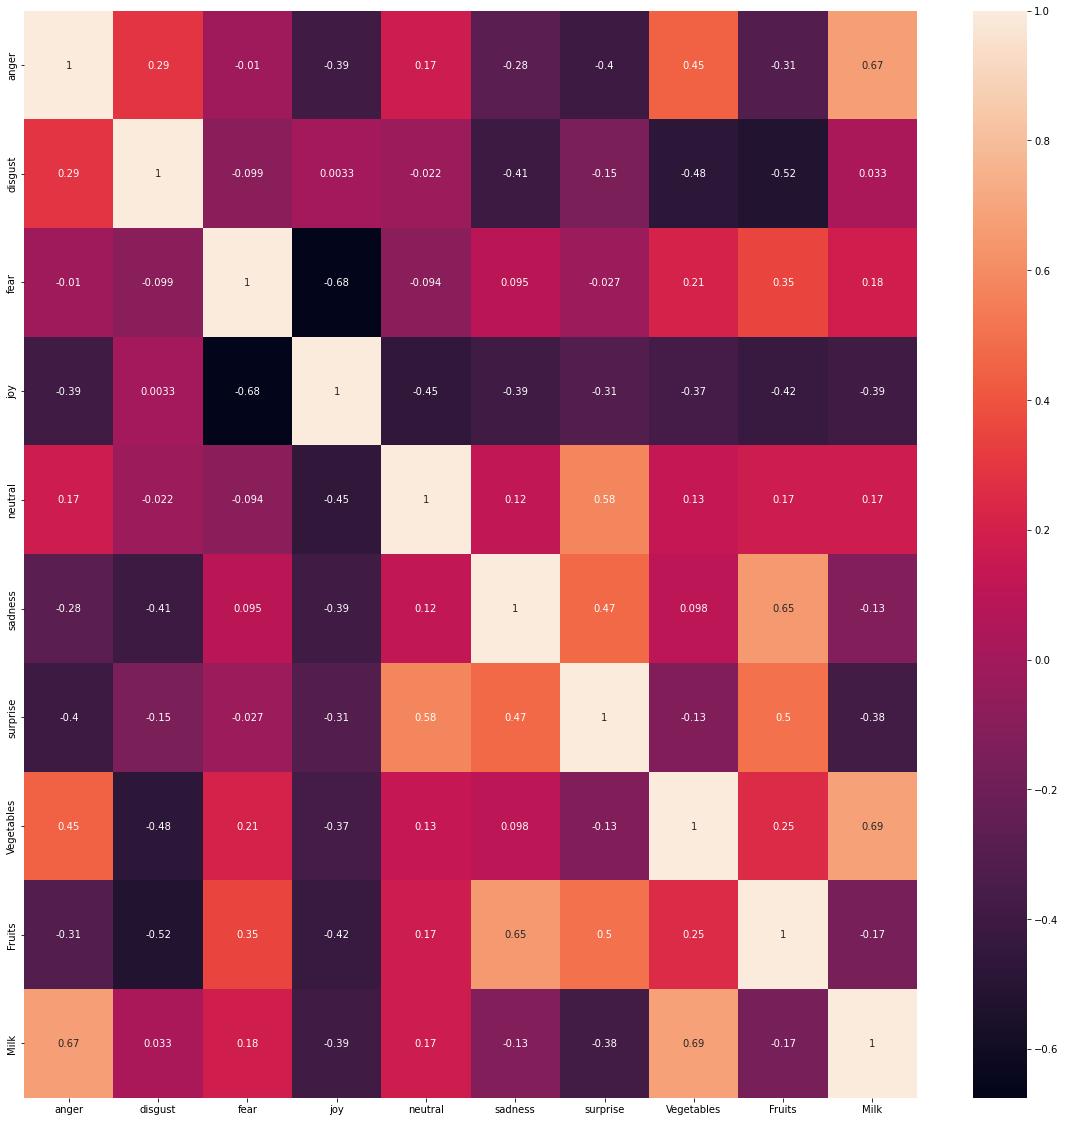

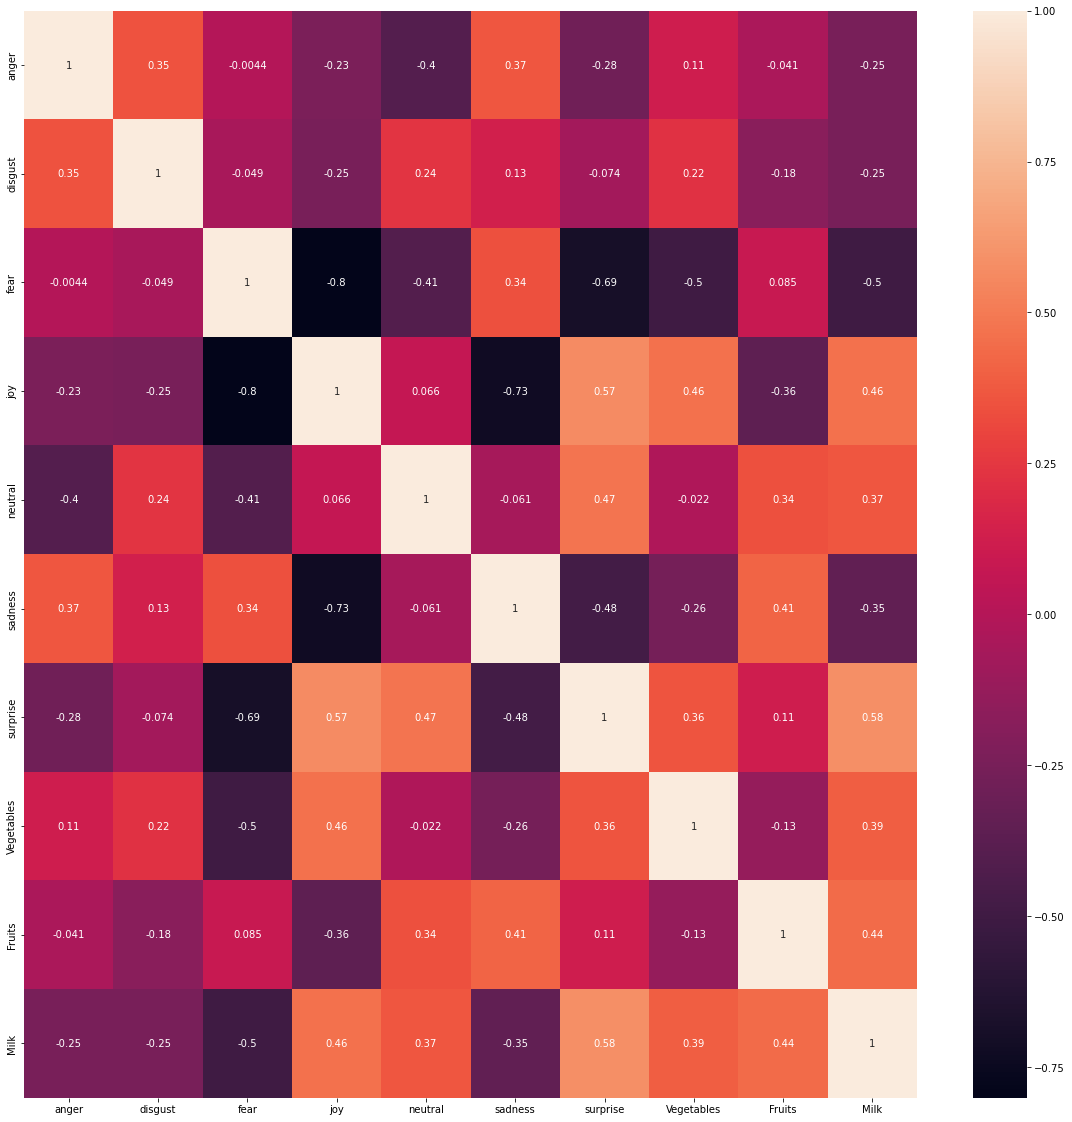

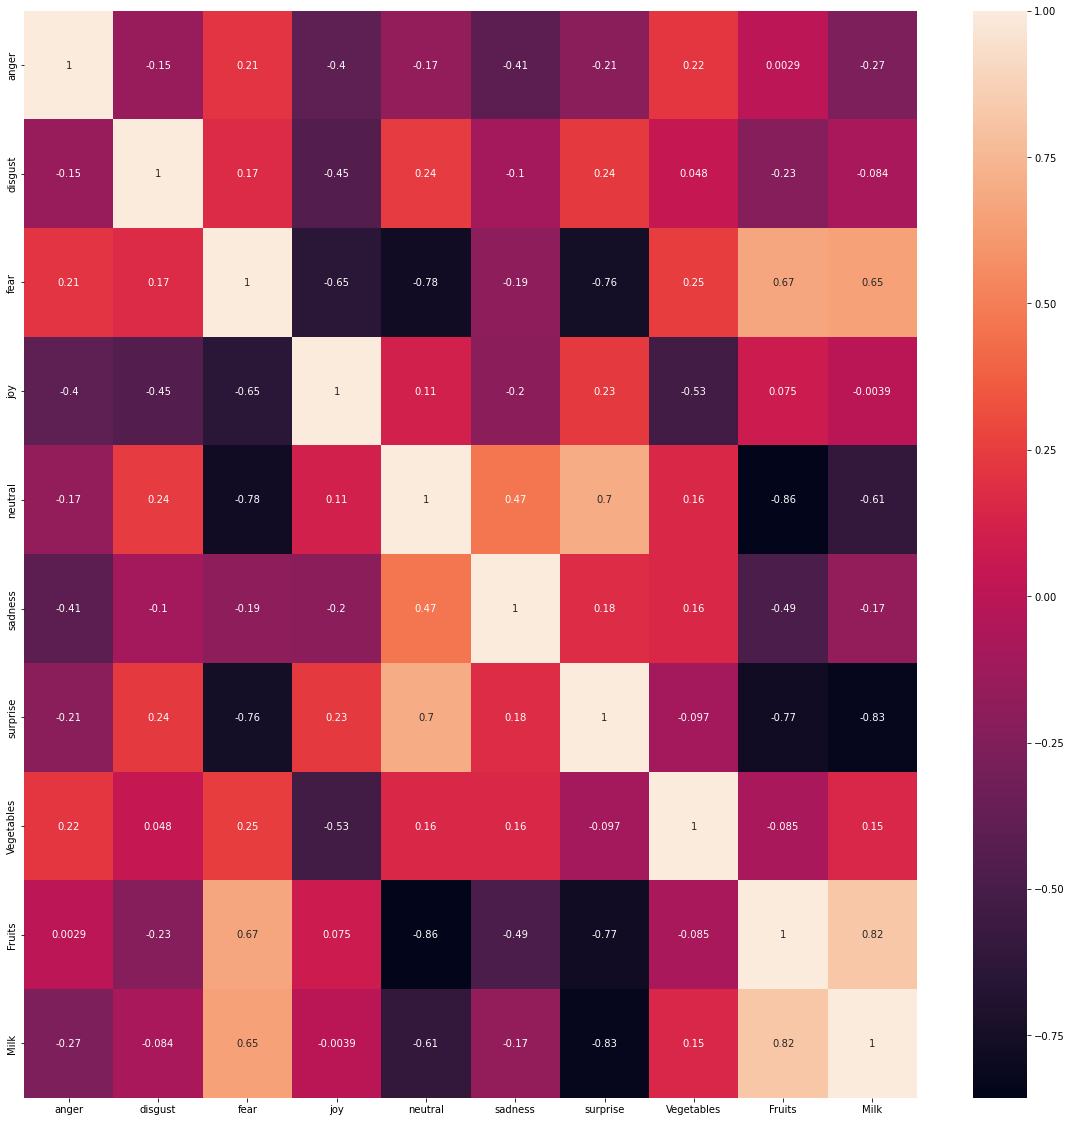

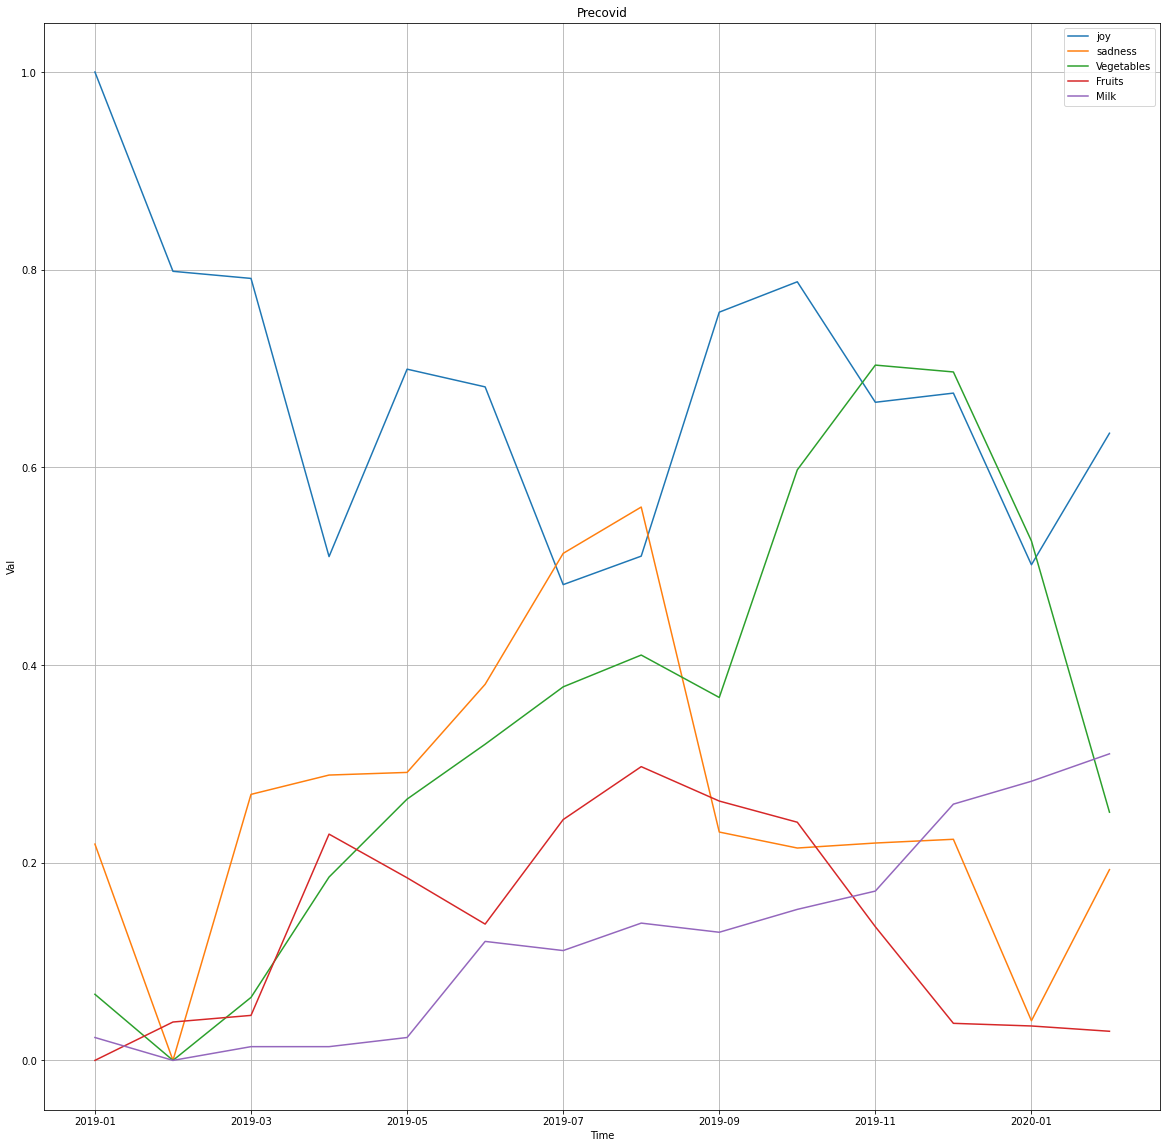

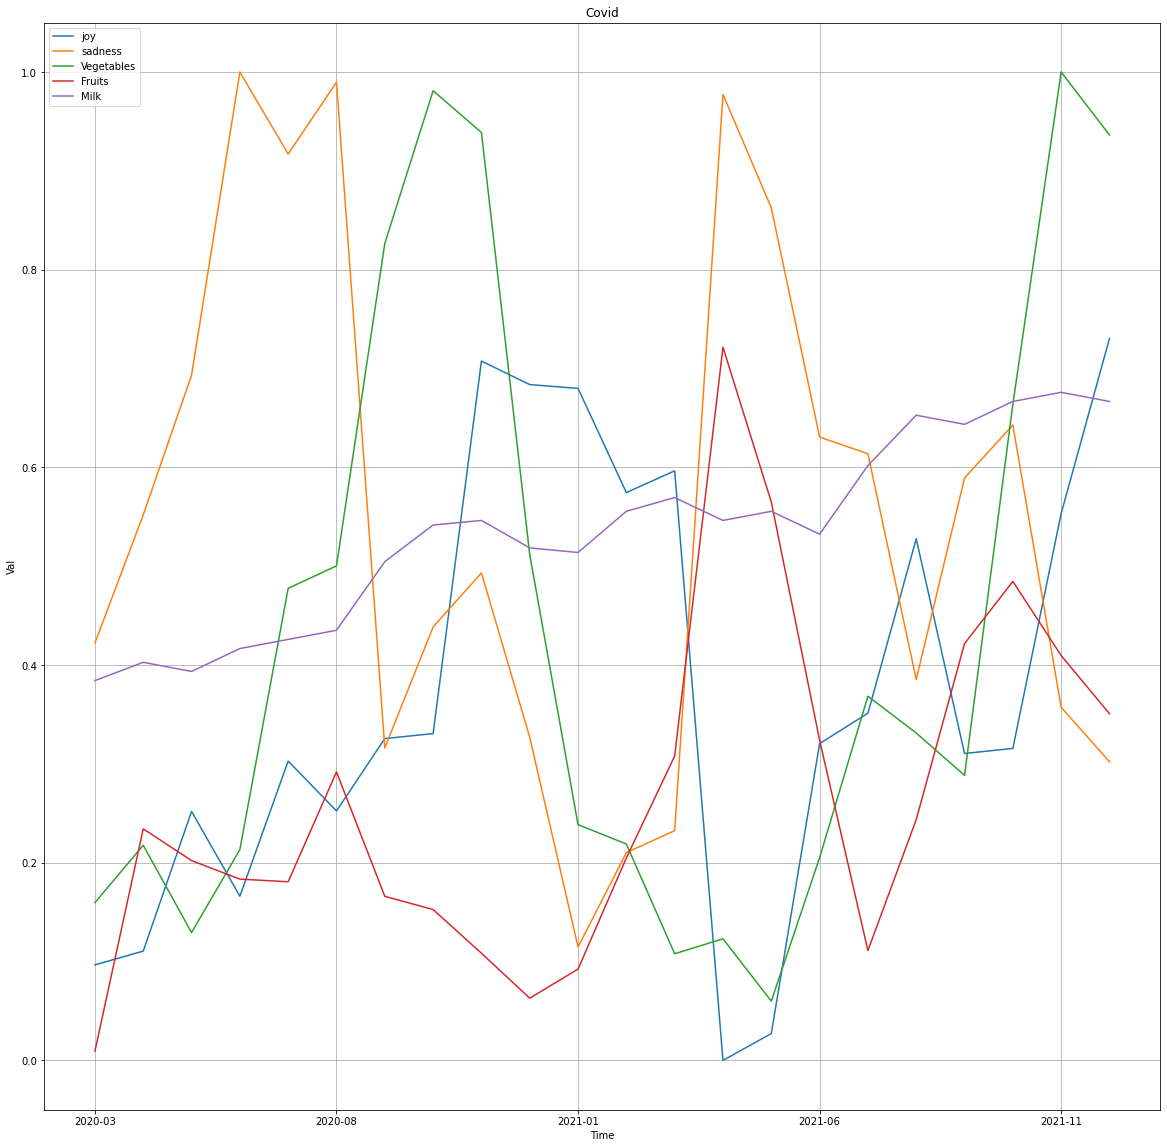

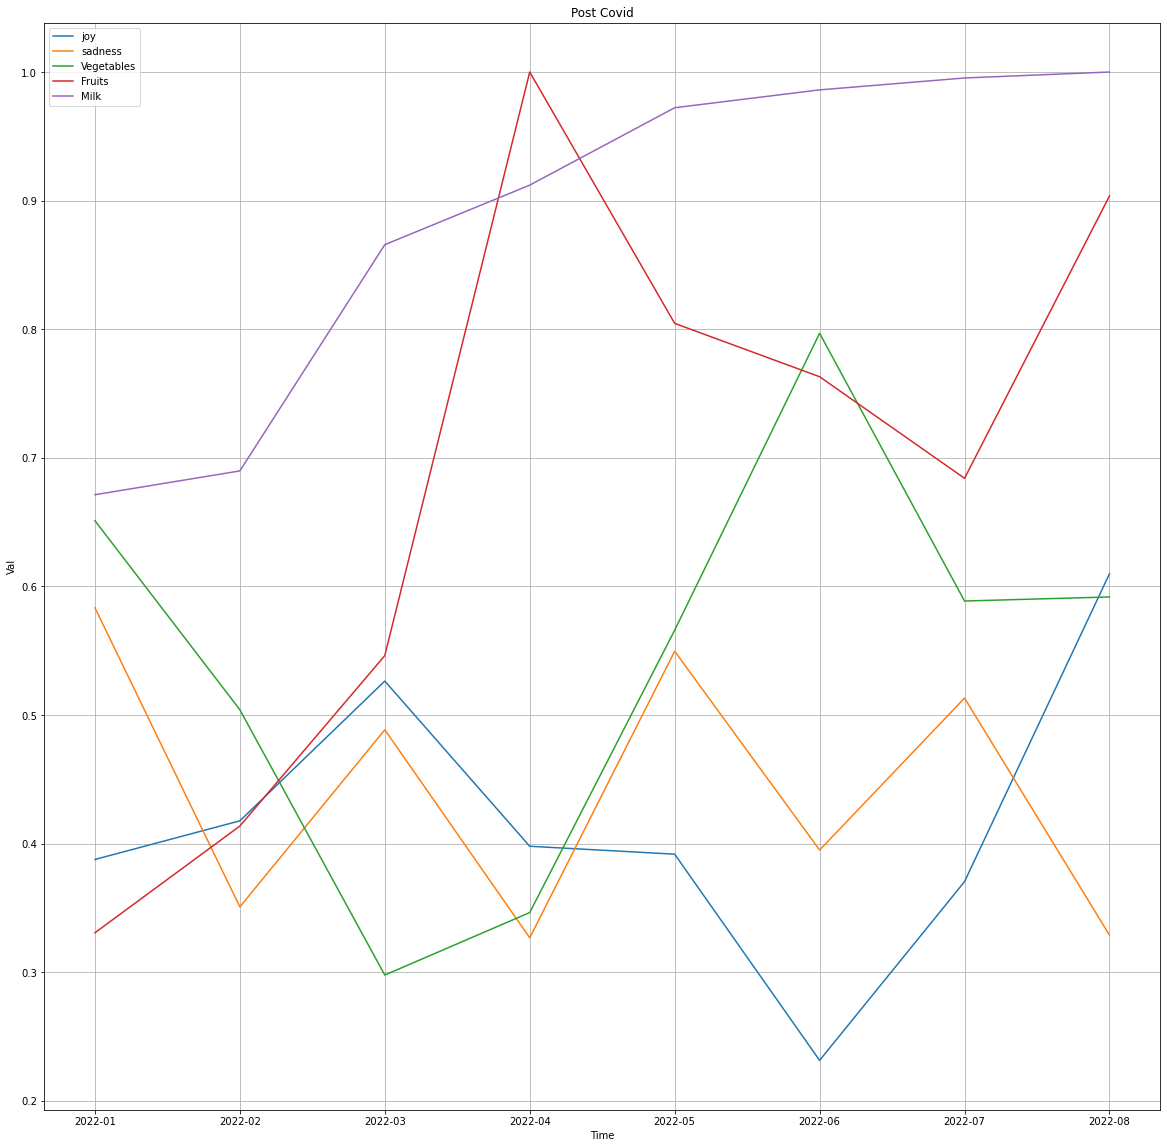

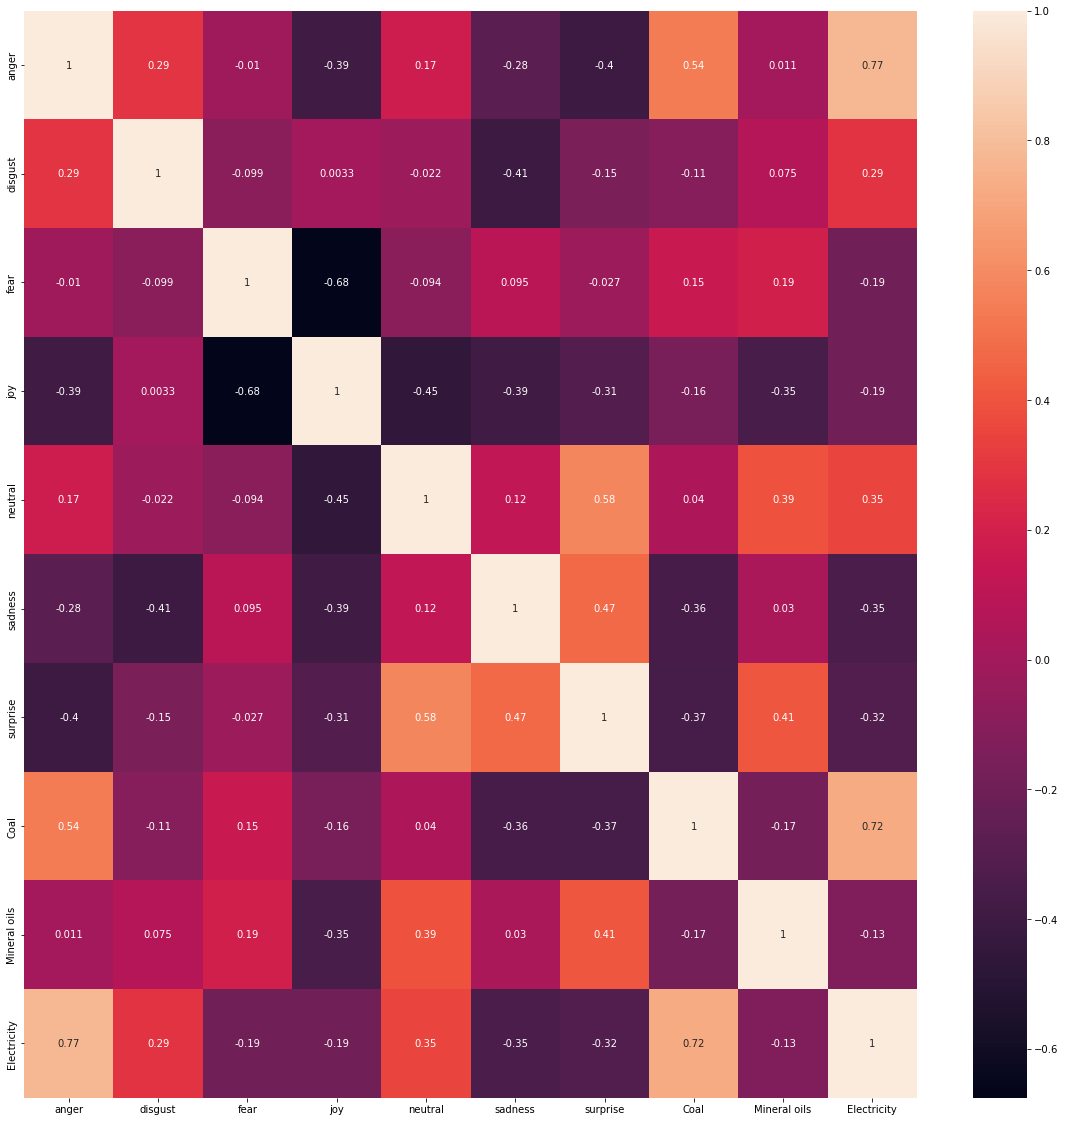

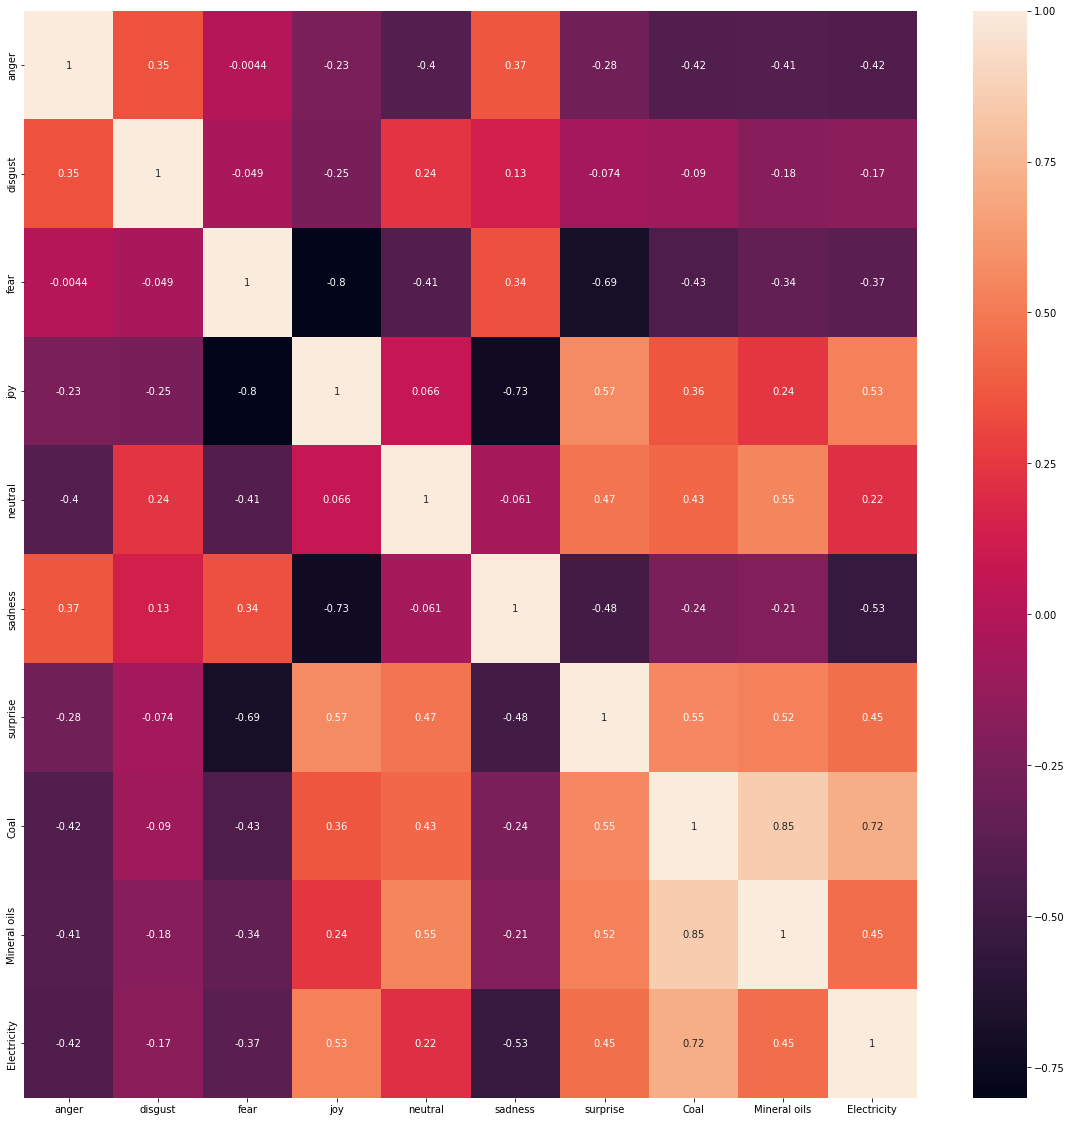

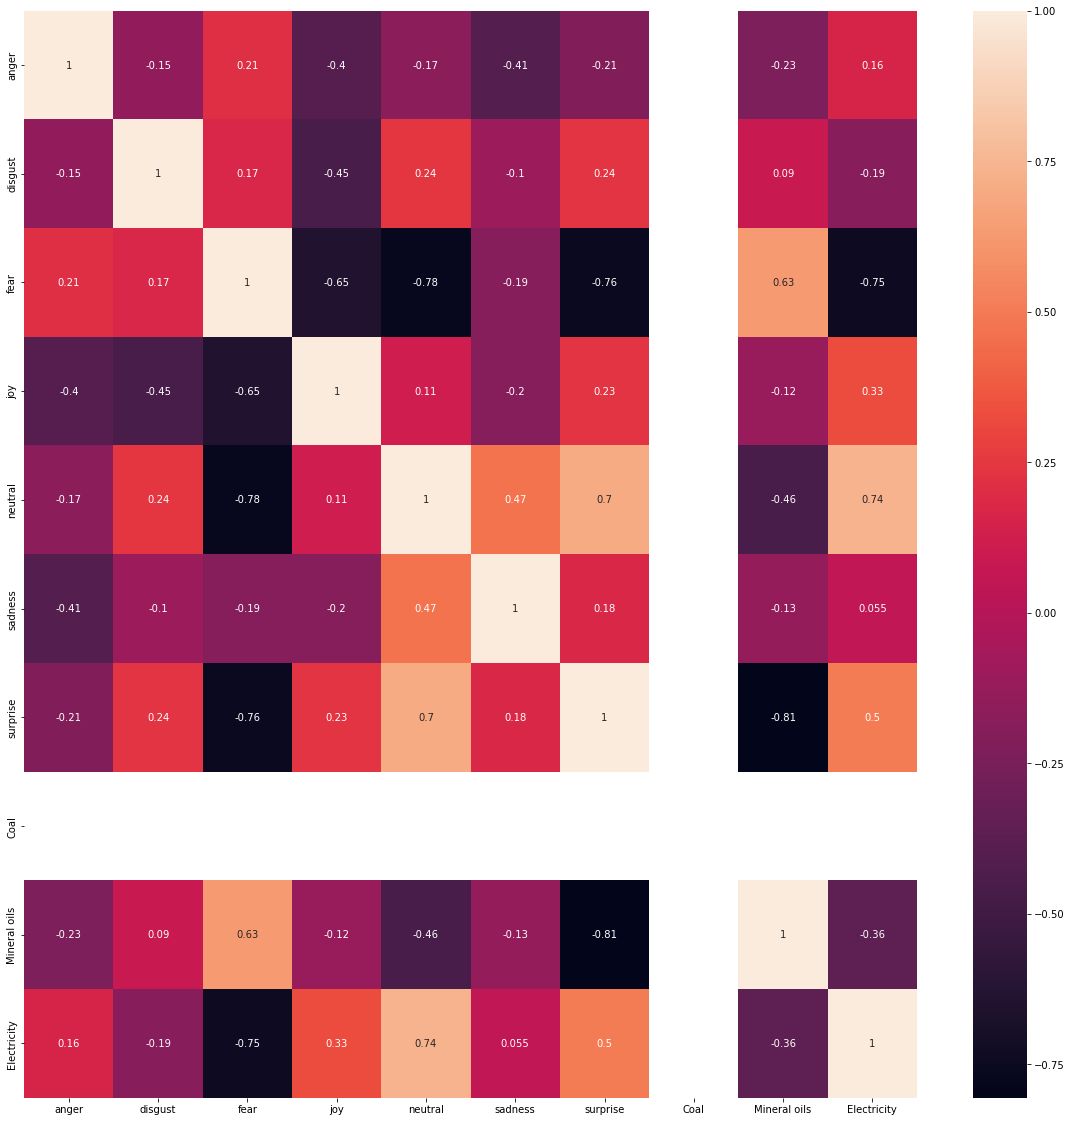

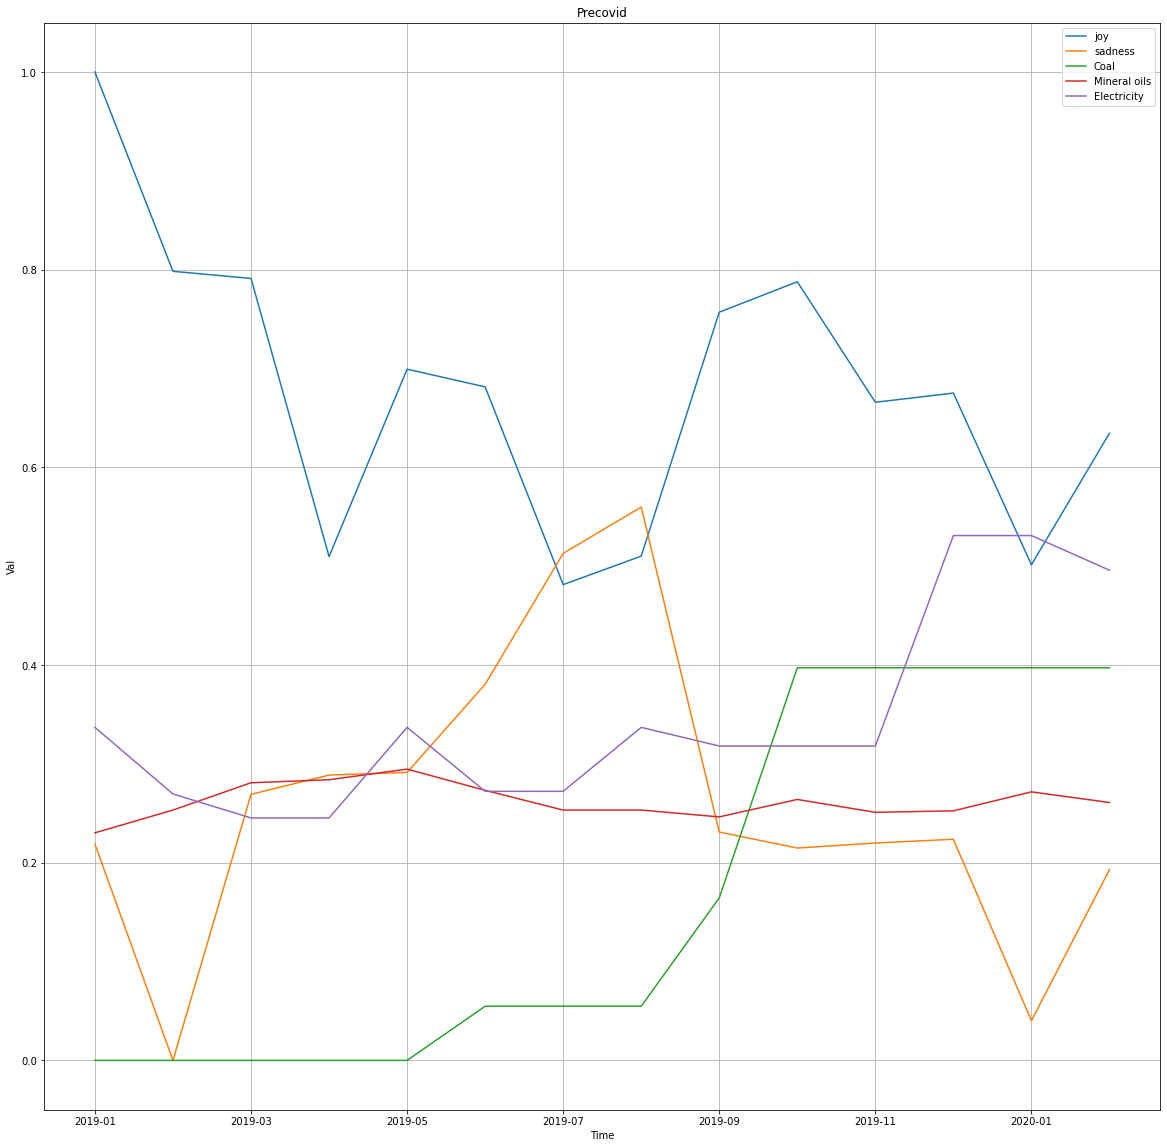

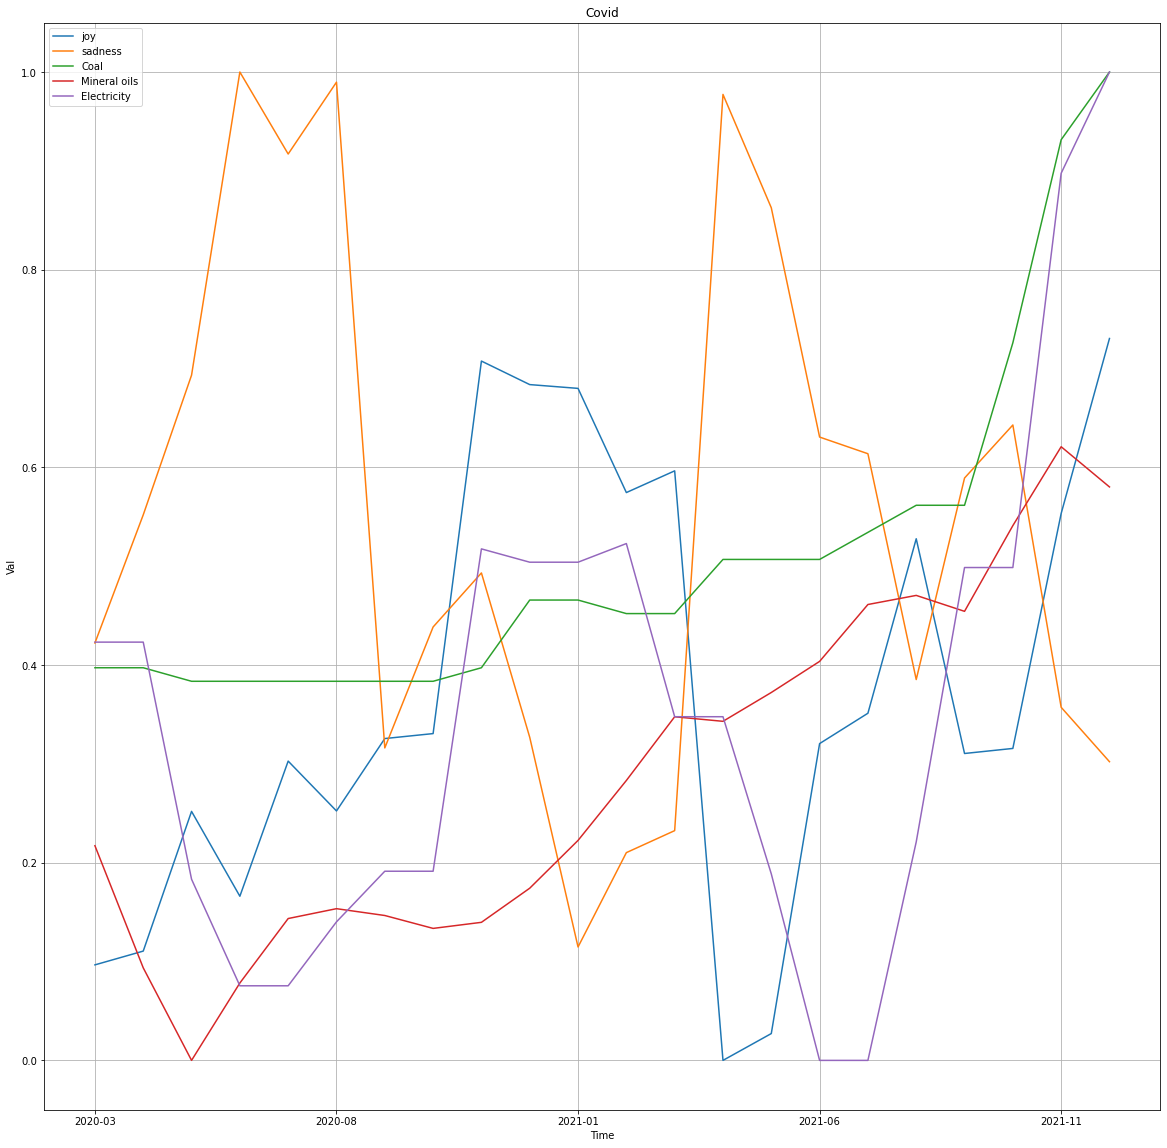

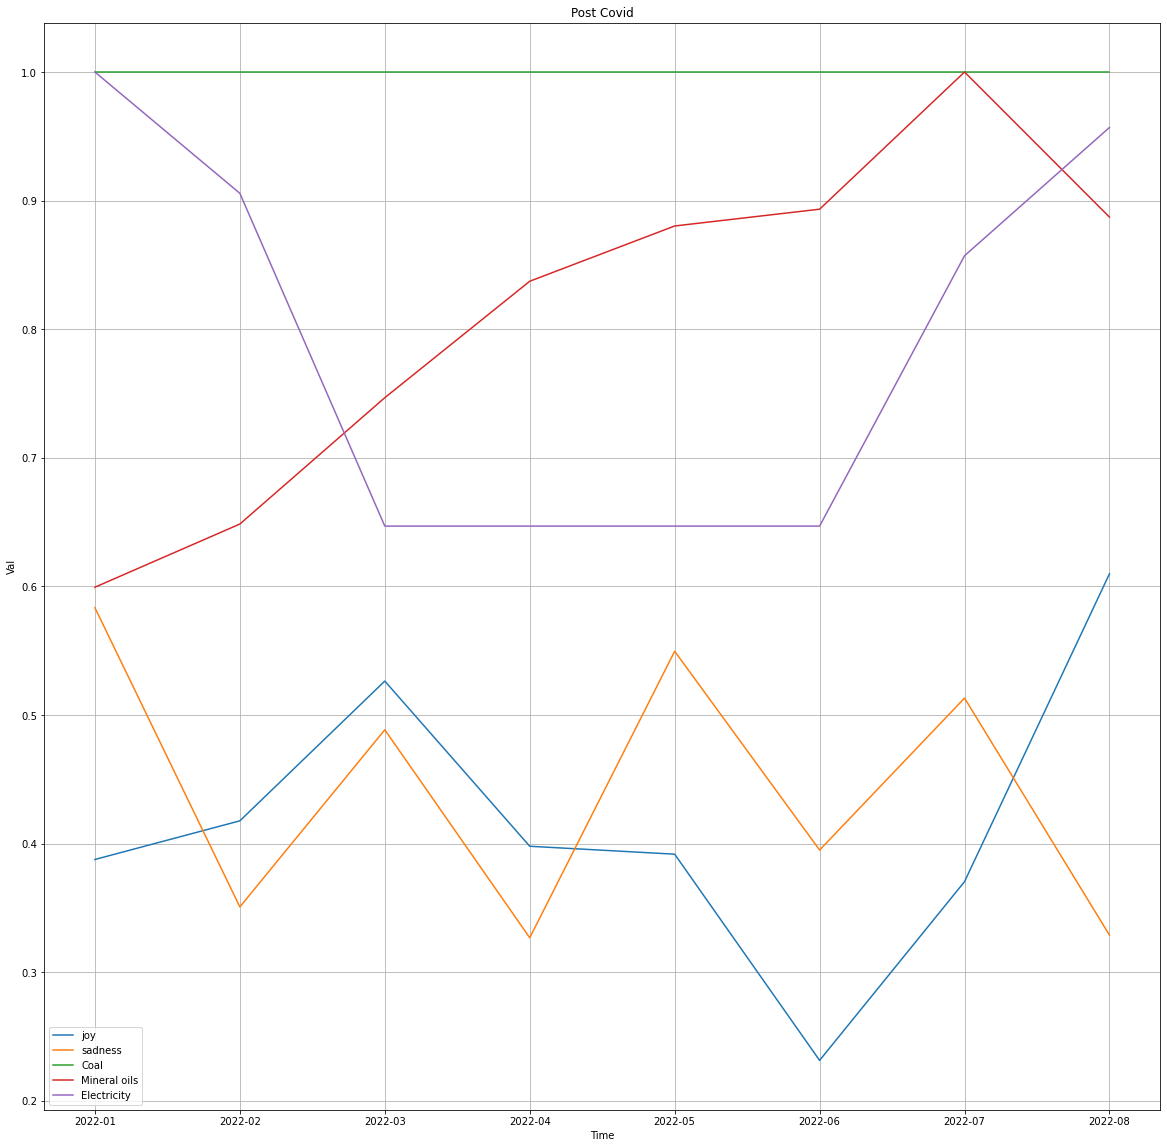

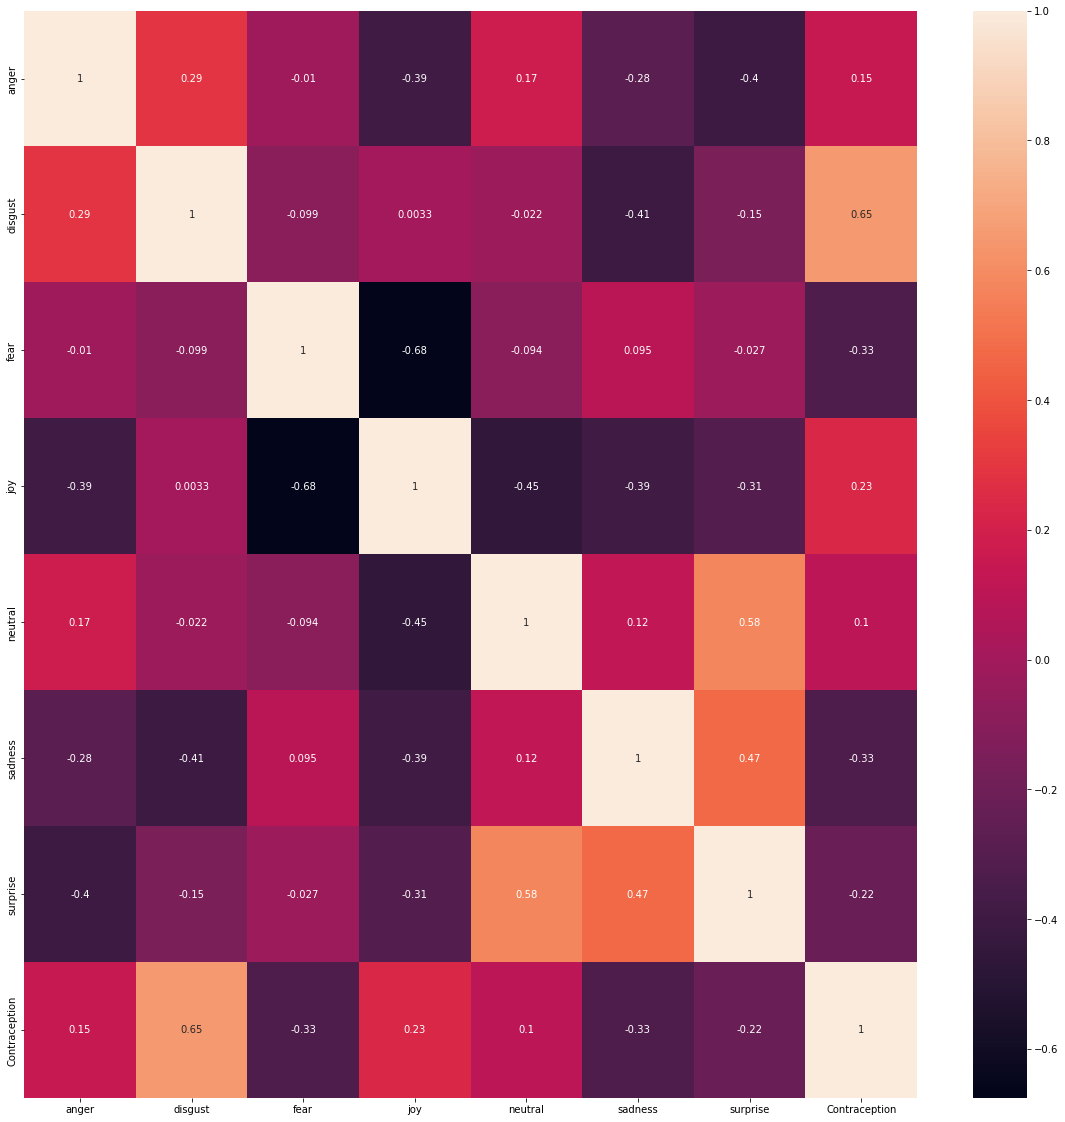

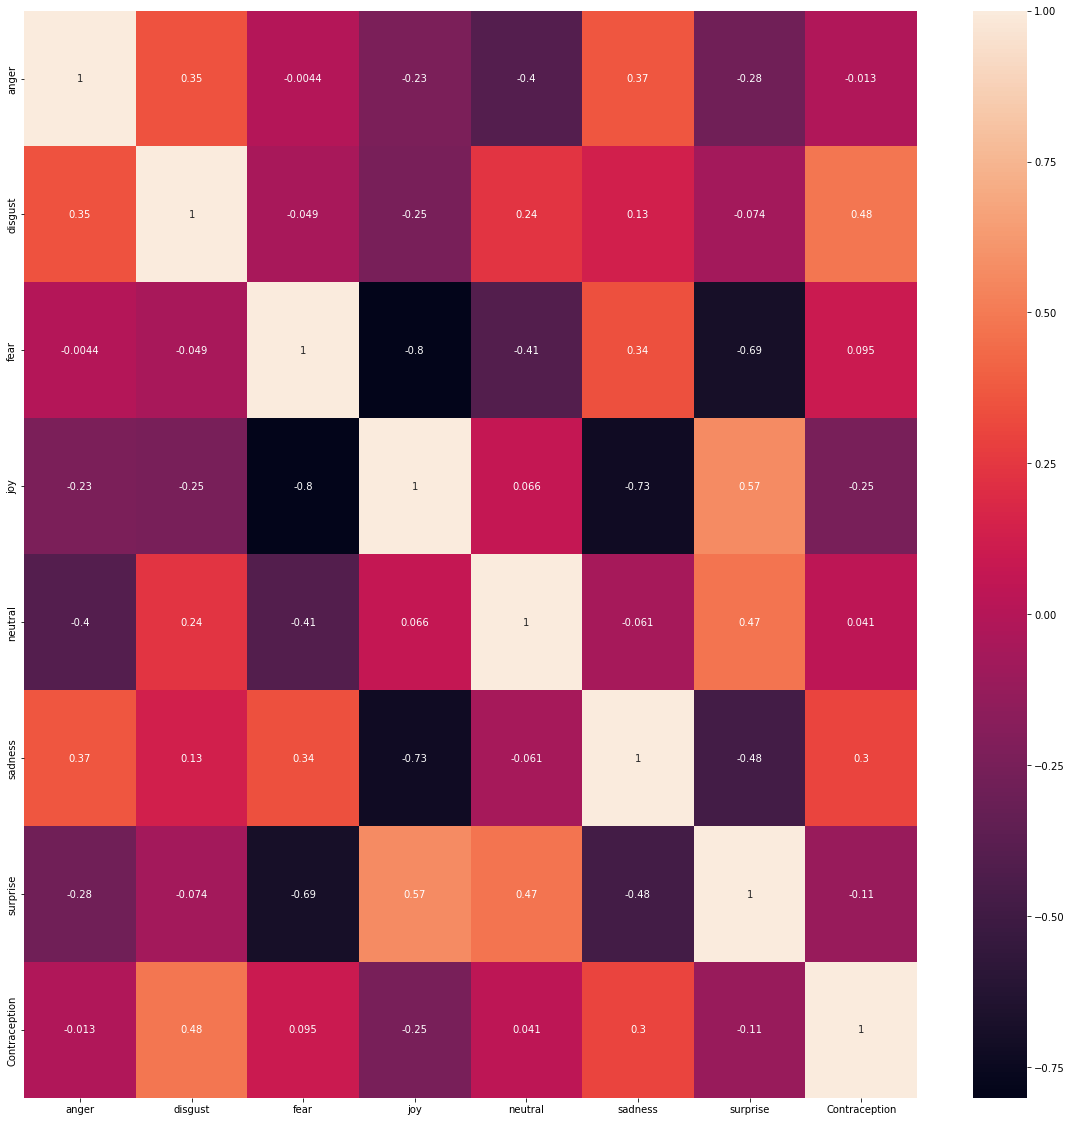

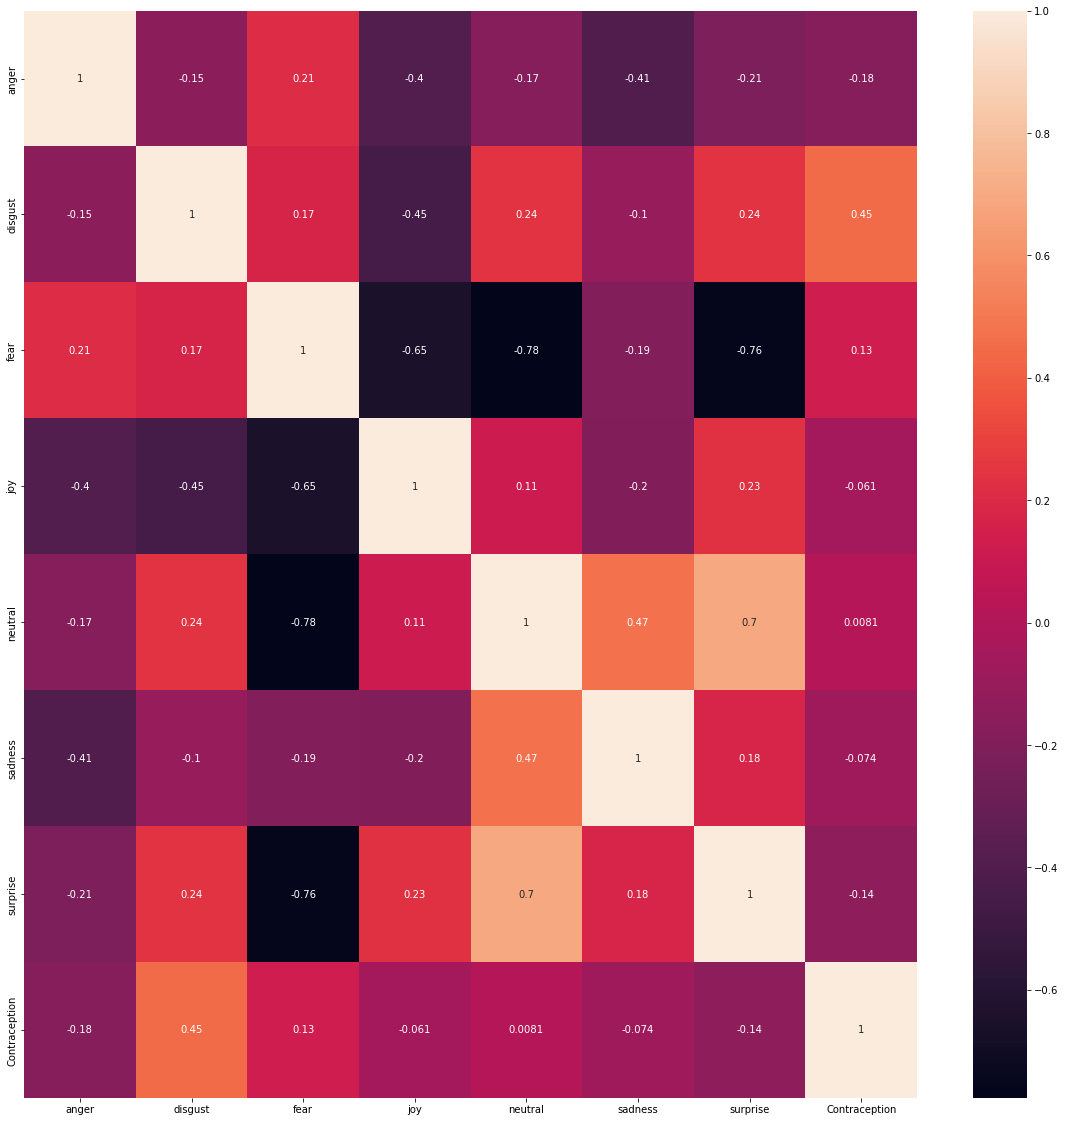

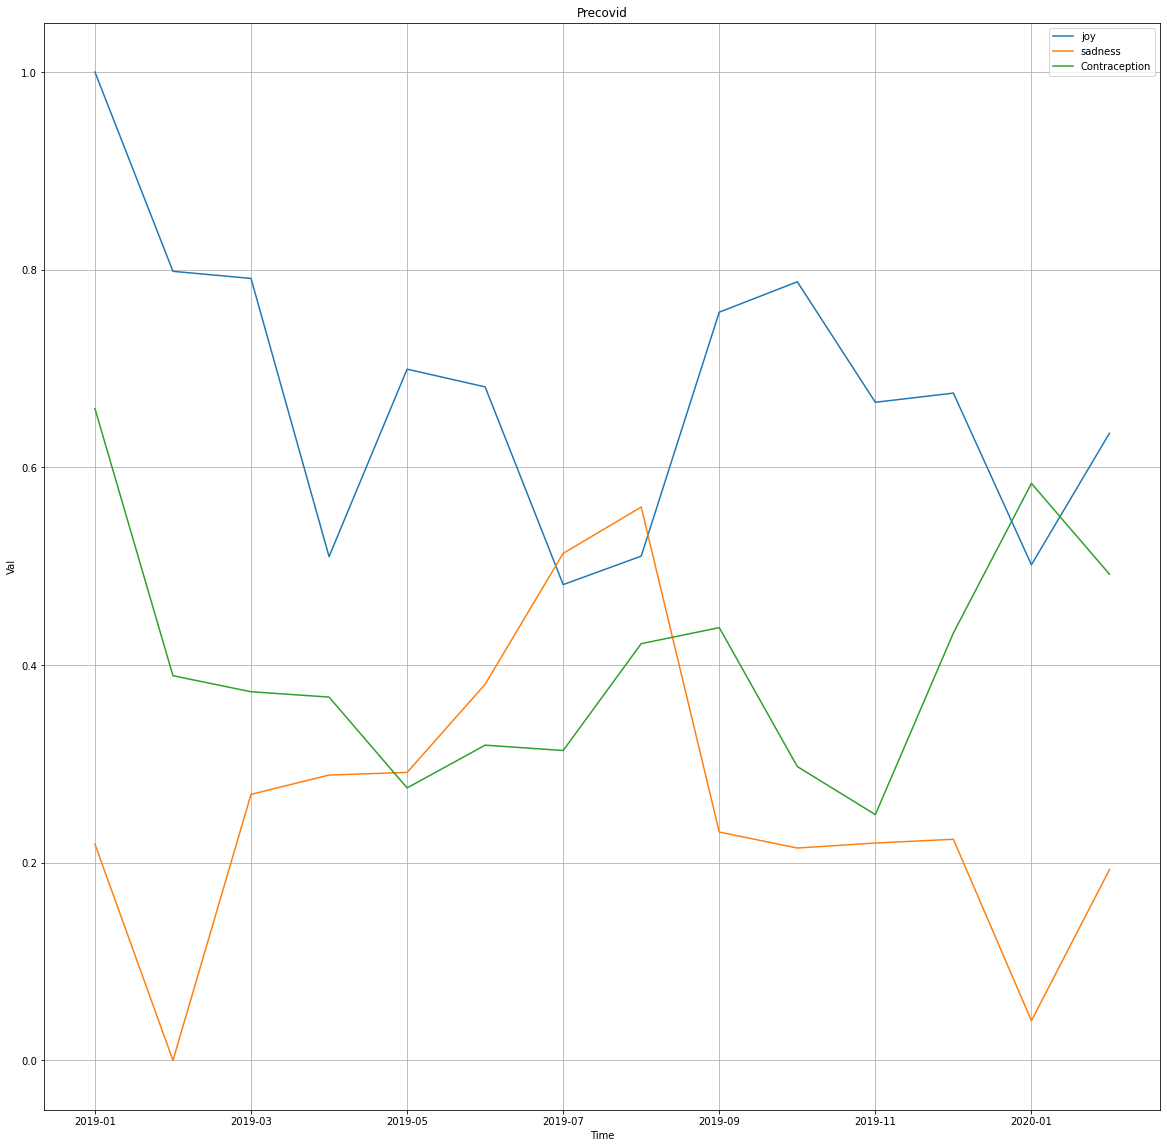

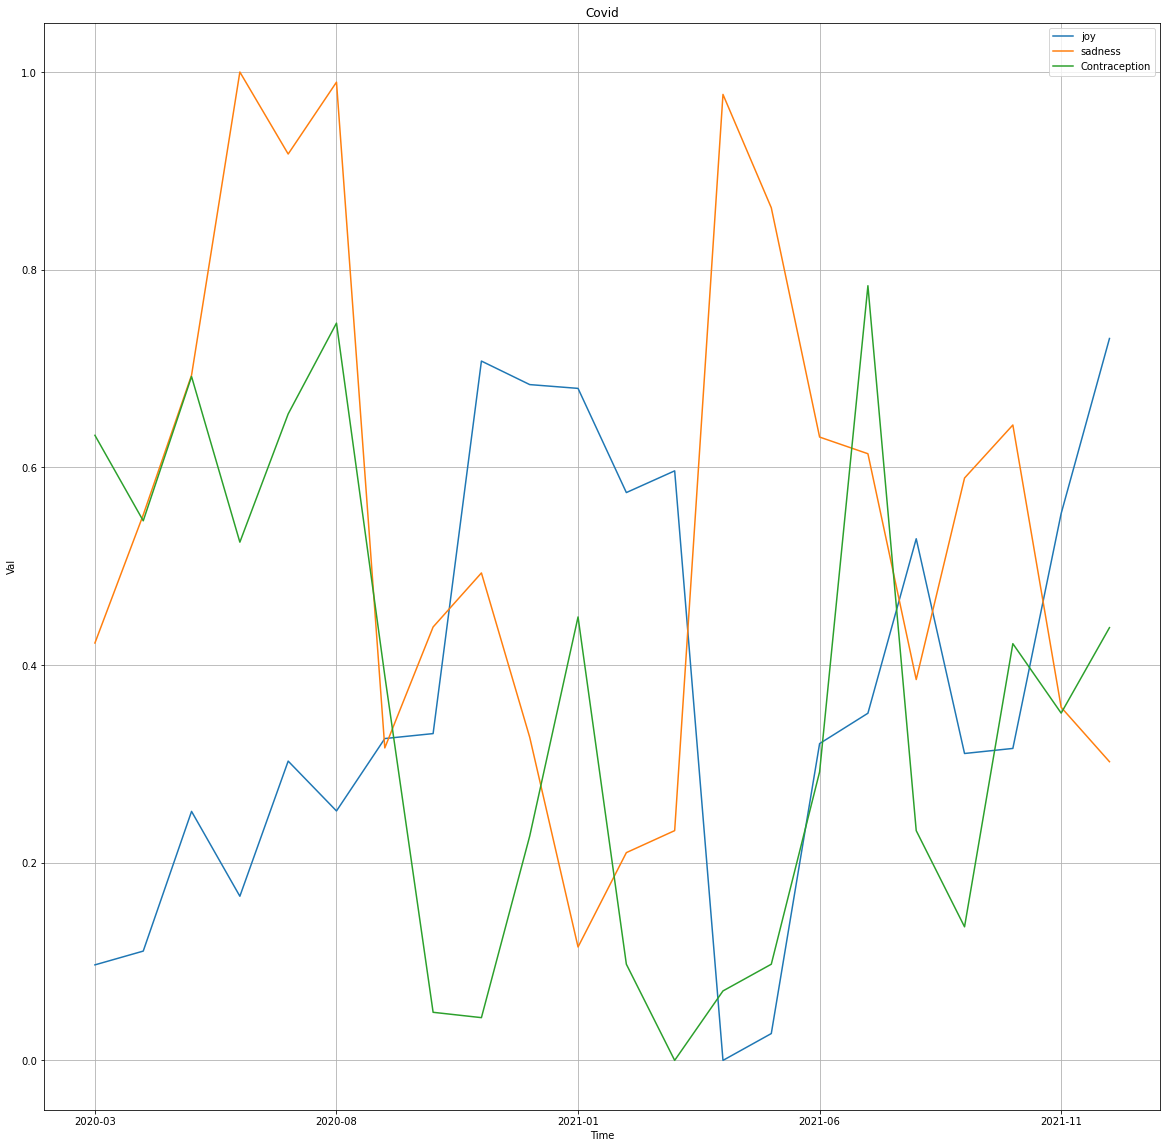

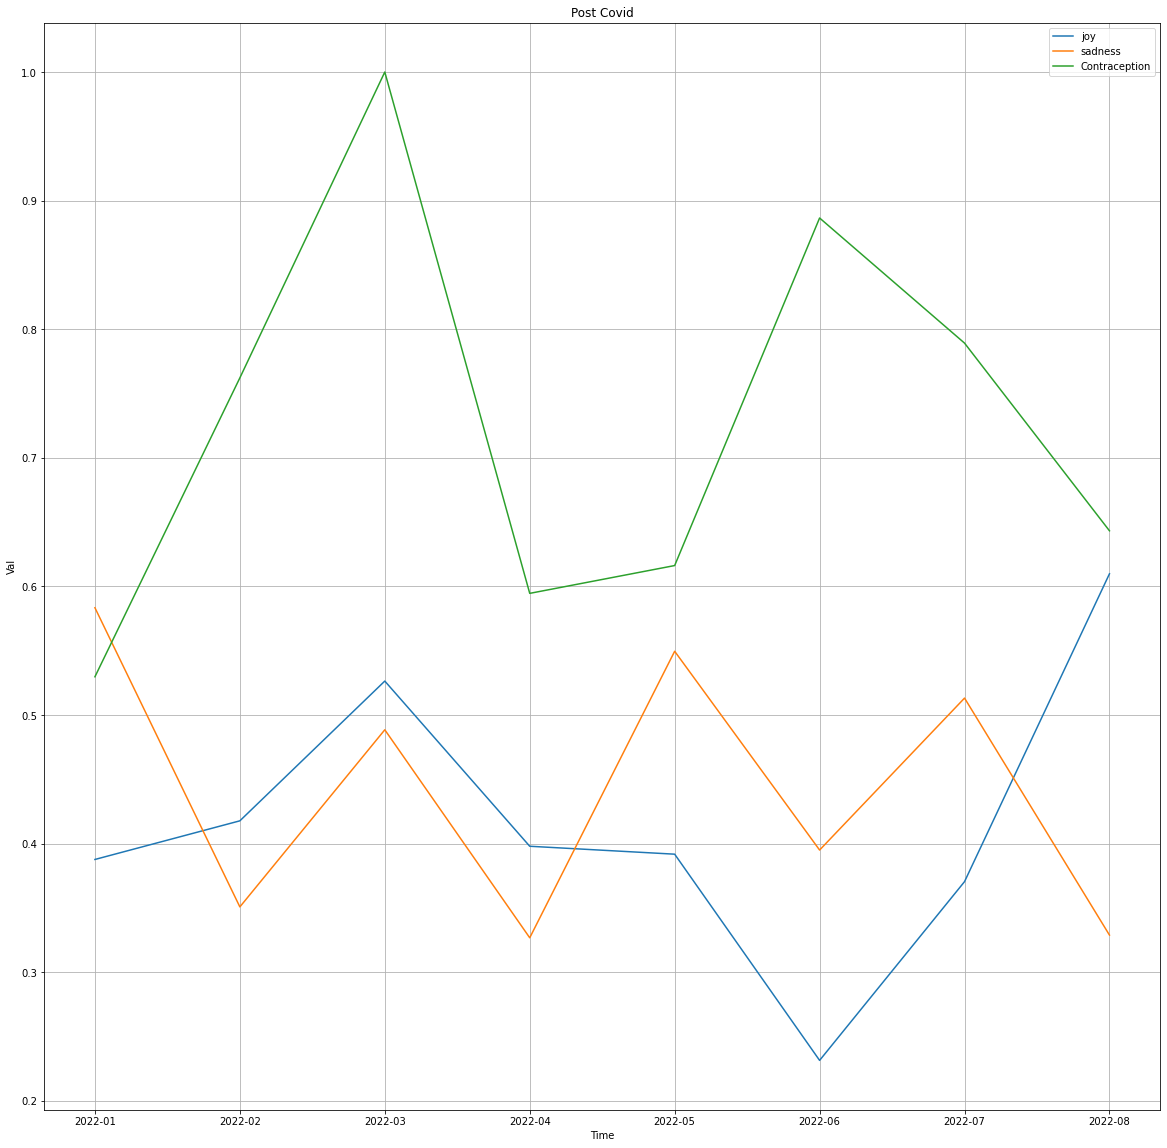

In [11]:
#Mumbai dfs
mumbai_files = r"*Enter the path pointing to the 'Sentiment_Output_Files' folder*"
# add additional paths here

paths = [(mumbai_files,"2020-03")] # add path

categories = ["Food","Energy","Contraception"]

for path in paths:
    output_dfs = get_dfs(path[0])
    first_case = dt.datetime.strptime(path[1], "%Y-%m")
    
    
    difference = int((first_case.year - START_DATE.year) * 12 + first_case.month - START_DATE.month)
    
    for idx,output in enumerate(output_dfs): # output: food, energy, contracep
#         f, ax = plt.subplots(figsize=(25, 25))
        output = output.set_index('date')
        df_norm = (output-output.min())/(output.max()-output.min())
        
        
        df_precovid = df_norm.iloc[:difference]
        df_covid = df_norm.iloc[difference:36]
        df_post_covid = df_norm.iloc[36:]
        
        
        precovid_corr = df_precovid.corr()
        covid_corr = df_covid.corr()
        post_covid_corr = df_post_covid.corr()
        
        plt.figure(figsize=(20, 20))
        precovid_heatmap = sn.heatmap(precovid_corr, annot=True)
        fig_precovid = precovid_heatmap.get_figure()
        fig_precovid.savefig(os.path.join(path[0], categories[idx]+ "_corrplot_precovid.jpg"))
        
        plt.figure(figsize=(20, 20))
        covid_heatmap = sn.heatmap(covid_corr, annot=True)
        fig_covid = covid_heatmap.get_figure()
        fig_covid.savefig(os.path.join(path[0],categories[idx]+  "_corrplot_covid.jpg"))
        
        plt.figure(figsize=(20, 20))
        post_covid_heatmap = sn.heatmap(post_covid_corr, annot=True)
        fig_post_covid = post_covid_heatmap.get_figure()
        fig_post_covid.savefig(os.path.join(path[0], categories[idx]+ "_corrplot_post_covid.jpg"))
        
       
        #line charts
        df_precovid_linechart = df_precovid.drop(['fear','disgust','neutral','anger','surprise'], axis=1)
        ax_food = df_precovid_linechart.plot(figsize=[20,20],title='Precovid')
        plt.grid()
        ax_food.set_xlabel("Time")
        ax_food.set_ylabel("Val")
        ax_food.figure.savefig(os.path.join(path[0],categories[idx]+ '_linechart_precovid.jpg'))

        df_covid_linechart = df_covid.drop(['fear','disgust','neutral','anger','surprise'], axis=1)
        ax_energy = df_covid_linechart.plot(figsize=[20,20],title='Covid')
        plt.grid()
        ax_energy.set_xlabel("Time")
        ax_energy.set_ylabel("Val")
        ax_energy.figure.savefig(os.path.join(path[0],categories[idx]+ '_linechart_covid.jpg'))

        df_postcovid_linechart = df_post_covid.drop(['fear','disgust','neutral','anger','surprise'], axis=1)
        ax_contraception = df_postcovid_linechart.plot(figsize=[20,20],title='Post Covid')
        plt.grid()
        ax_contraception.set_xlabel("Time")
        ax_contraception.set_ylabel("Val")
        ax_contraception.figure.savefig(os.path.join(path[0],categories[idx]+ '_linechart_post_covid.jpg'))